In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2  # 특성 선택 함수
from sklearn.ensemble import RandomForestRegressor # 랜덤포레스트 회귀모델

In [15]:
# 데이터 가져오기
apart_df = pd.read_csv("../data/20250605_102903_seoul_real_estate.csv")
interest_rate_df = pd.read_csv("../data/deposit_lending_rate.csv")
school_df = pd.read_csv("../data/seoul_shcool_info.csv")
subway_df = pd.read_csv("../data/seoul_subway_encoding.csv")

In [16]:
# 아파트 데이터 결측치 확인
apart_summary = apart_df.describe(include='all').T # 각 컬럼별 요약 통계
apart_missing = apart_df.isnull().sum() # 결측치 개수
apart_missing_ratio = (apart_missing / len(apart_df)) * 100 if len(apart_df) > 0 else apart_df


missing_data = pd.DataFrame()

# apart_summary['missing_count'] = apart_missing
# apart_summary['missing_ratio(%)'] = apart_missing_ratio

missing_data['missing_count'] = apart_missing
missing_data['missing_ratio(%)'] = apart_missing_ratio

missing_data

,missing_count,missing_ratio(%)
RCPT_YR,0,0.000000
CGG_CD,0,0.000000
CGG_NM,1,0.000732
STDG_CD,0,0.000000
STDG_NM,0,0.000000
LOTNO_SE,6,0.004390
LOTNO_SE_NM,6,0.004390
MNO,7,0.005122
SNO,7,0.005122
BLDG_NM,0,0.000000


In [17]:
# 금리 데이터 결측치 확인
interest_rate_df.describe(include='all')
rate_missing = interest_rate_df.isnull().sum()
rate_missing_ratio = (rate_missing / len(interest_rate_df)) * 100 if len(apart_df) > 0 else apart_df

missing_data = pd.DataFrame()

missing_data['missing_count'] = rate_missing
missing_data['missing_ratio(%)'] = rate_missing_ratio

missing_data

,missing_count,missing_ratio(%)
Unnamed: 0,0,0.0
landing,0,0.0
deposit,0,0.0
diff,0,0.0
Unnamed: 4,352,100.0


In [18]:
# 학교 데이터 결측치 확인
school_df.describe(include='all')
school_missing = school_df.isnull().sum()
school_missing_ratio = (school_missing / len(school_df)) * 100 if len(school_df) > 0 else school_df

missing_data = pd.DataFrame()

missing_data['missing_count'] = school_missing
missing_data['missing_ratio(%)'] = school_missing_ratio

missing_data

,missing_count,missing_ratio(%)
school_type,0,0.000000
type,0,0.000000
school_name,0,0.000000
address,0,0.000000
high_school_type,1095,27.820122


In [19]:
# 지하철 데이터 결측치 확인
subway_df.describe(include='all')
subway_missing = subway_df.isnull().sum()
subway_missing_ratio = (subway_missing / len(subway_df)) * 100 if len(subway_df) > 0 else subway_df

missing_data = pd.DataFrame()

missing_data['missing_count'] = subway_missing
missing_data['missing_ratio(%)'] = subway_missing_ratio

missing_data

,missing_count,missing_ratio(%)
Unnamed: 0,0,0.0
연번,0,0.0
역번호,0,0.0
호선,0,0.0
역명,0,0.0
역전화번호,0,0.0
도로명주소,0,0.0
지번주소,0,0.0


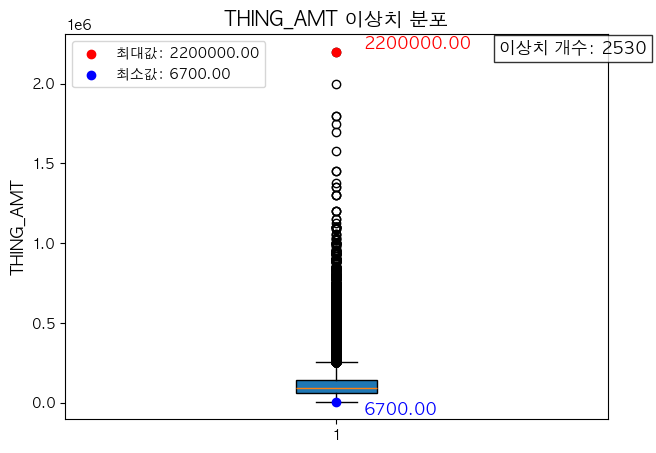

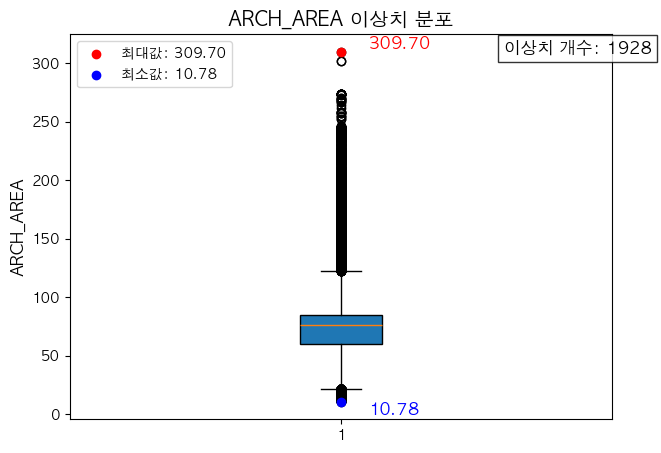

/Users/jeon-yeongnam/Desktop/project/1st-project-/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


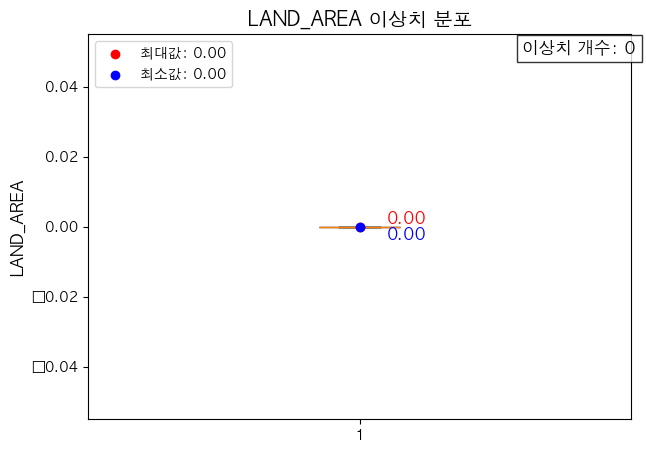

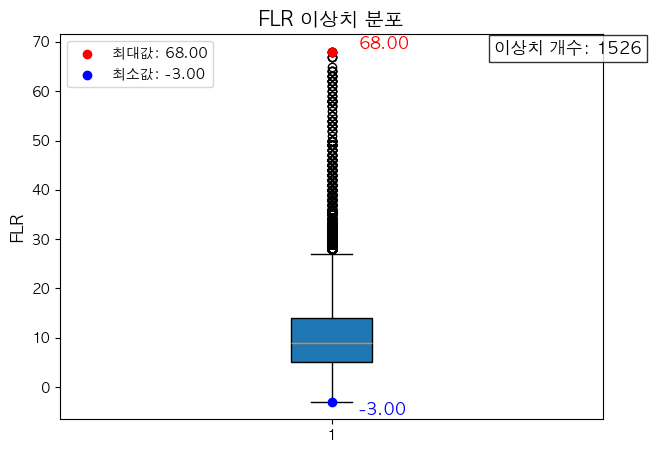

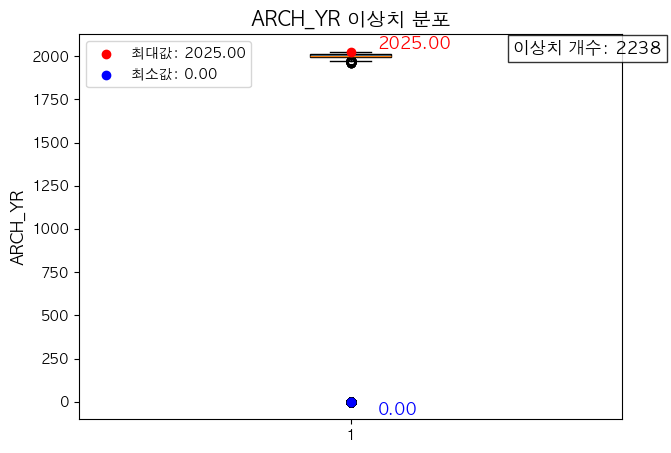

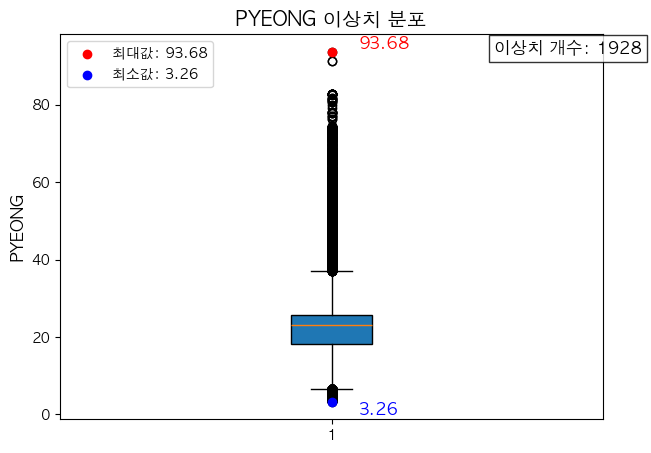

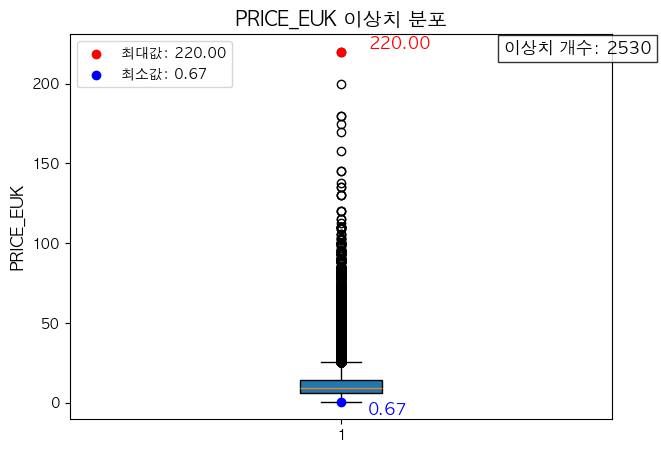

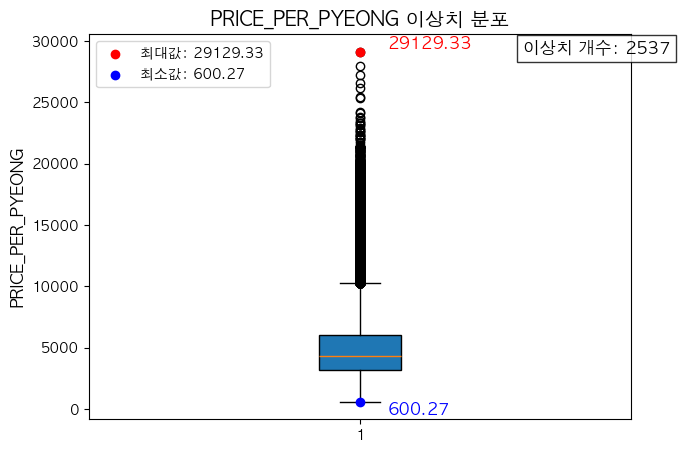

In [20]:
numeric_cols = ['THING_AMT', 'ARCH_AREA', 'LAND_AREA', 'FLR', 'ARCH_YR', 'PYEONG', 'PRICE_EUK', 'PRICE_PER_PYEONG']

for i in numeric_cols:
    z_score = (apart_df[i] - apart_df[i].mean()) / apart_df[i].std()
    outliers = apart_df[np.abs(z_score) > 3]

    data = apart_df[i].dropna()
    max_idx = data.idxmax()
    min_idx = data.idxmin()
    max_val = data[max_idx]
    min_val = data[min_idx]

    # 박스플롯 생성 (원본 데이터 전체)
    plt.figure(figsize=(7, 5))
    plt.rcParams['font.family'] = 'AppleGothic'
    plt.boxplot(apart_df[i].dropna(),  # NaN 제거
                vert=True, 
                patch_artist=True,
                showfliers=True)  # 이상치 표시
    
    # 레이블 설정
    plt.title(f'{i} 이상치 분포', fontsize=14)
    plt.ylabel(i, fontsize=12)
    
    # 이상치 개수 표시
    plt.text(0.8, 0.95, f'이상치 개수: {len(outliers)}', 
             transform=plt.gca().transAxes,
             fontsize=12, 
             bbox=dict(facecolor='white', alpha=0.8))
    
    # 최대값, 최소값 표시 (박스플롯은 x축이 1이므로 x=1에 표시)
    plt.scatter(1, max_val, color='red', label=f'최대값: {max_val:.2f}', zorder=3)
    plt.scatter(1, min_val, color='blue', label=f'최소값: {min_val:.2f}', zorder=3)

    # 최대값, 최소값 옆에 숫자 표시!
    plt.text(1.05, max_val, f'{max_val:.2f}', color='red', fontsize=12, verticalalignment='bottom')
    plt.text(1.05, min_val, f'{min_val:.2f}', color='blue', fontsize=12, verticalalignment='top')
    
    plt.legend()
    plt.show()

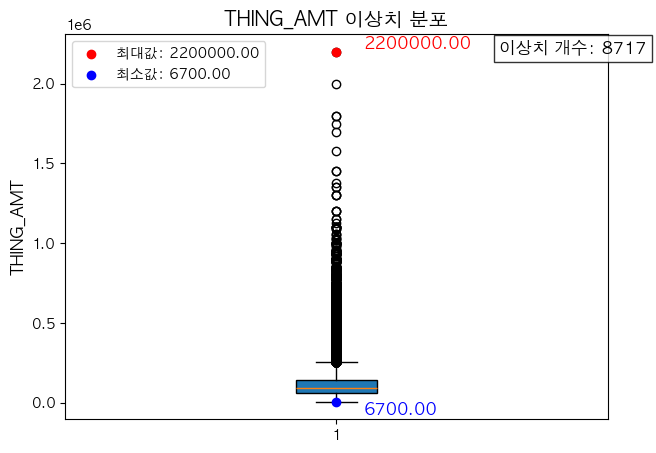

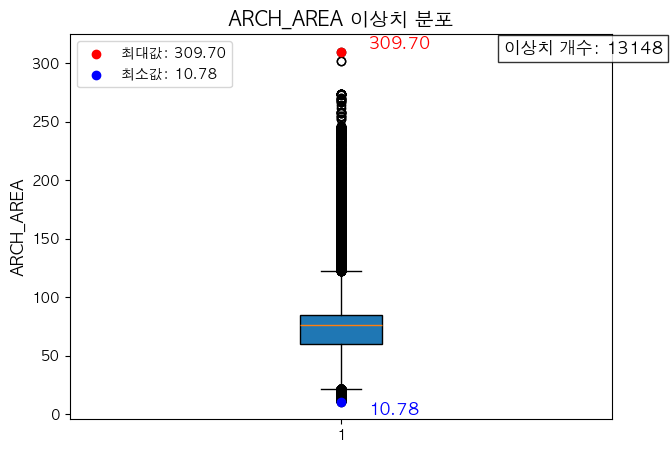

/Users/jeon-yeongnam/Desktop/project/1st-project-/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


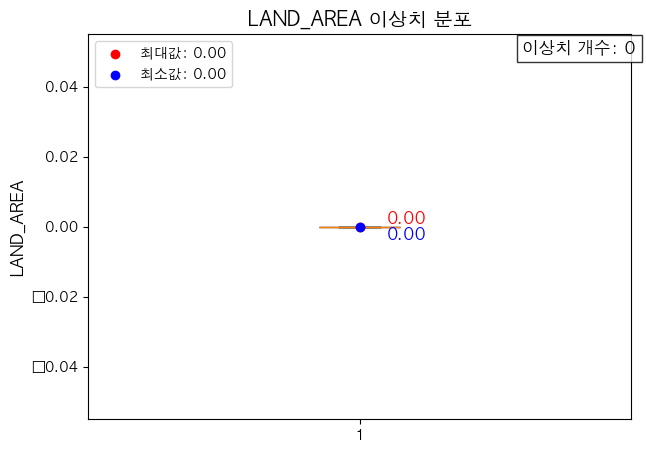

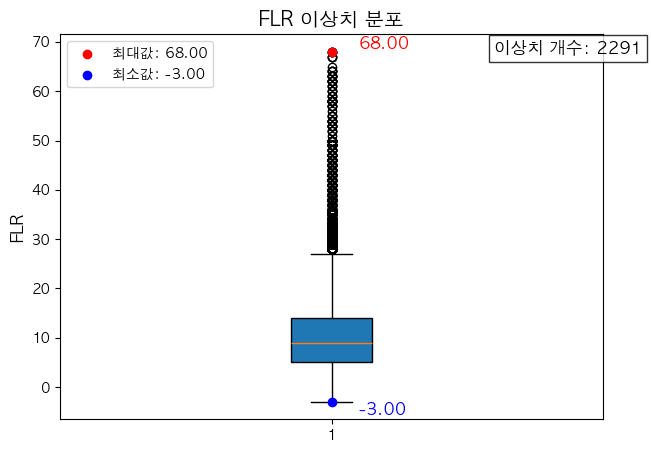

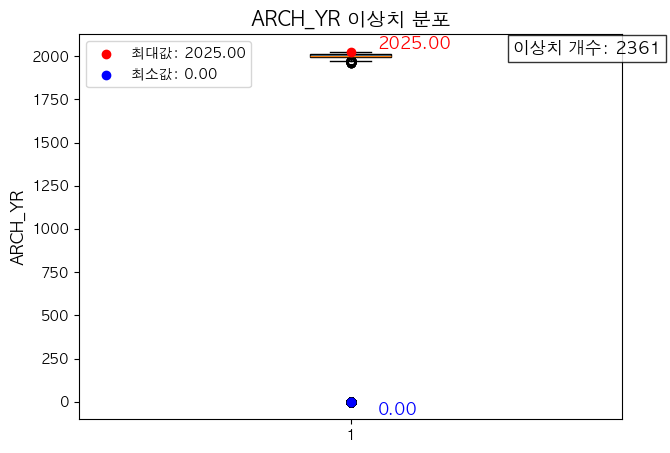

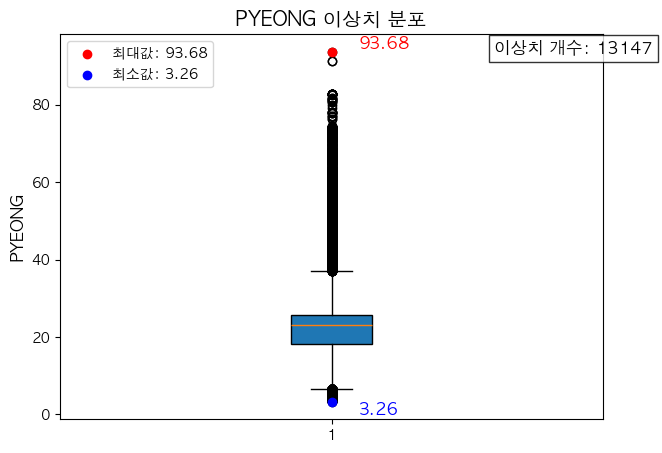

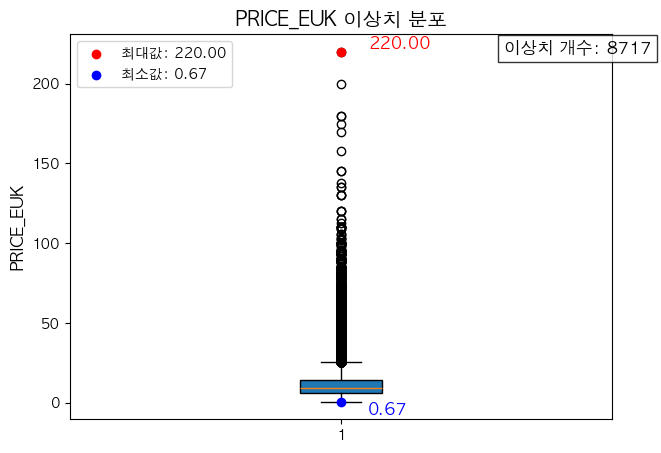

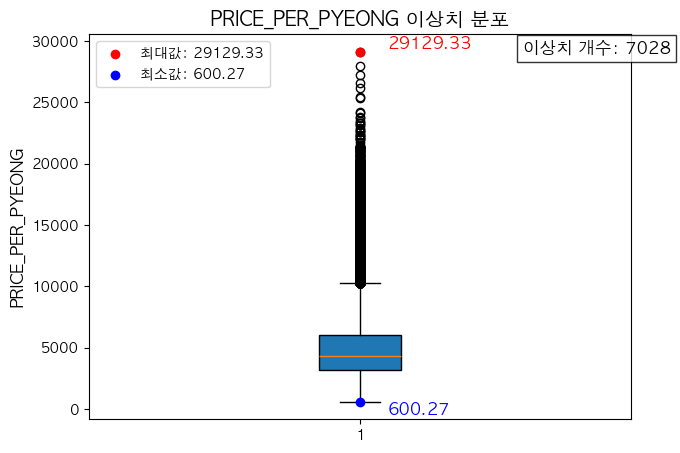

In [21]:
numeric_cols = ['THING_AMT', 'ARCH_AREA', 'LAND_AREA', 'FLR', 'ARCH_YR', 'PYEONG', 'PRICE_EUK', 'PRICE_PER_PYEONG']

for i in numeric_cols:
    # IQR 계산
    Q1 = apart_df[i].quantile(0.25)
    Q3 = apart_df[i].quantile(0.75)
    IQR = Q3 - Q1

    # 이상치 탐지
    outliers = apart_df[(apart_df[i] < Q1 - 1.5 * IQR) | (apart_df[i] > Q3 + 1.5 * IQR)]

    data = apart_df[i].dropna()
    max_idx = data.idxmax()
    min_idx = data.idxmin()
    max_val = data[max_idx]
    min_val = data[min_idx]

    # 박스플롯 생성 (원본 데이터 전체)
    plt.figure(figsize=(7, 5))
    plt.rcParams['font.family'] = 'AppleGothic'
    plt.boxplot(apart_df[i].dropna(),  # NaN 제거
                vert=True, 
                patch_artist=True,
                showfliers=True)  # 이상치 표시
    
    # 레이블 설정
    plt.title(f'{i} 이상치 분포', fontsize=14)
    plt.ylabel(i, fontsize=12)
    
    # 이상치 개수 표시
    plt.text(0.8, 0.95, f'이상치 개수: {len(outliers)}', 
             transform=plt.gca().transAxes,
             fontsize=12, 
             bbox=dict(facecolor='white', alpha=0.8))
    
    # 최대값, 최소값 표시 (박스플롯은 x축이 1이므로 x=1에 표시)
    plt.scatter(1, max_val, color='red', label=f'최대값: {max_val:.2f}', zorder=3)
    plt.scatter(1, min_val, color='blue', label=f'최소값: {min_val:.2f}', zorder=3)

    # 최대값, 최소값 옆에 숫자 표시!
    plt.text(1.05, max_val, f'{max_val:.2f}', color='red', fontsize=12, verticalalignment='bottom')
    plt.text(1.05, min_val, f'{min_val:.2f}', color='blue', fontsize=12, verticalalignment='top')
    
    plt.legend()
    plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder

# 데이터 불러오기
seoul_df = pd.read_csv("../data/20250605_102903_seoul_real_estate.csv")

# 숫자로 바꿔야 할 컬럼 리스트
str_columns = [
    'CGG_NM', 'STDG_NM', 'LOTNO_SE_NM', 'BLDG_NM',
    'BLDG_USG', 'DCLR_SE', 'OPBIZ_RESTAGNT_SGG_NM',
    'ARCH_DECADE', 'PYEONG_GROUP', 'BLDG_USG'
]

# LabelEncoder로 문자열을 숫자로 변환
for col in str_columns:
    le = LabelEncoder()
    seoul_df[col] = le.fit_transform(seoul_df[col].astype(str))

# 전처리 날짜 분리

# CTRT_DAY를 날짜 타입으로 변환
seoul_df['CTRT_DAY'] = pd.to_datetime(seoul_df['CTRT_DAY'])

# 연, 월, 일로 분리해서 새로운 컬럼 만들기
seoul_df['YEAR'] = seoul_df['CTRT_DAY'].dt.year
seoul_df['MONTH'] = seoul_df['CTRT_DAY'].dt.month
seoul_df['DAY_NUM'] = seoul_df['CTRT_DAY'].dt.day

# 원래 CTRT_DAY 컬럼은 삭제
seoul_df = seoul_df.drop('CTRT_DAY', axis=1)

print(seoul_df)

# 결측값(null, NaN)이 있는 행 삭제
seoul_df.dropna(subset=['LOTNO_SE','MNO','SNO','ARCH_YR'], inplace=True)

# 결측값(null, NaN)이 있는 열 삭제
seoul_df.drop(['LAND_AREA', 'RGHT_SE', 'RTRCN_DAY', 'PRICE_EUK'], axis=1, inplace=True)

# seoul_df.isnull().sum()

# 불필요한 컬럼 제거
# 아파트만 하기때문에 건물용도(BLDG_USG) 속성 제거

seoul_df.drop(labels=['BLDG_USG'], axis=1, inplace=True)

        RCPT_YR  CGG_CD  CGG_NM  STDG_CD  STDG_NM  LOTNO_SE  LOTNO_SE_NM  \
0          2025   11230      11    10600      253       1.0            1   
1          2025   11680       1    11000      191       1.0            1   
2          2025   11680       1    10300        8       1.0            1   
3          2025   11200      16    10900       23       1.0            1   
4          2025   11500       4    10300      315       1.0            1   
...         ...     ...     ...      ...      ...       ...          ...   
136667     2022   11530       7    10700        7       1.0            1   
136668     2022   11650      15    10800      145       1.0            1   
136669     2022   11710      18    11300        9       1.0            1   
136670     2022   11650      15    10300      229       1.0            1   
136671     2023   11350       9    10600      264       1.0            1   

           MNO  SNO  BLDG_NM  ...  DCLR_SE  OPBIZ_RESTAGNT_SGG_NM  \
0        365.0  4.

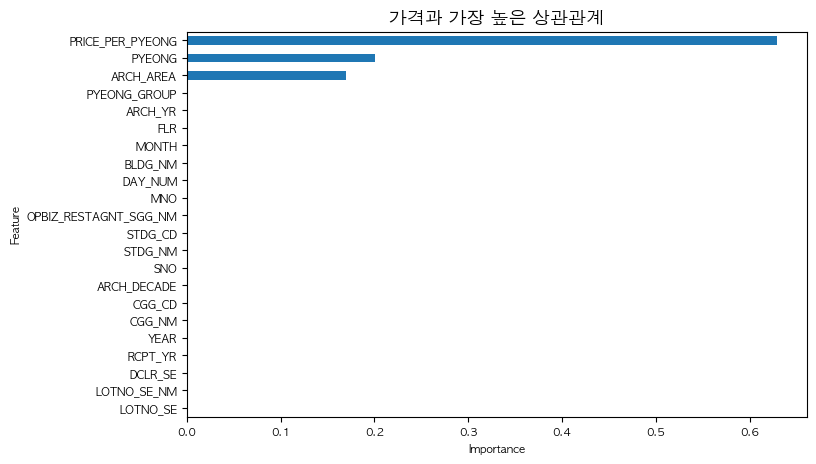

In [23]:
X = seoul_df.drop('THING_AMT', axis=1)  # 입력 데이터(속성)
y = seoul_df['THING_AMT']               # 타겟(거래금액)

# 랜덤포레스트 모델 학습
model = RandomForestRegressor(random_state=0)
model.fit(X, y)

# 속성 중요도 가져오기
importances = model.feature_importances_
feature_names = X.columns

# 판다스 시리즈로 변환해서 정렬
feat_importances = pd.Series(importances, index=feature_names)
feat_importances = feat_importances.sort_values(ascending=True)

# 1. 폰트 설정 (애플고딕, macOS)
plt.rcParams['font.family'] = 'AppleGothic'   # 한글 폰트
plt.rcParams['font.size'] = 8                # 전체 폰트 크기
plt.rcParams['axes.unicode_minus'] = False    # 마이너스 깨짐 방지

# 가로 막대그래프 그리기
plt.figure(figsize=(8, 5))
feat_importances.plot(kind='barh')  # barh: 가로 막대그래프
plt.title('가격과 가장 높은 상관관계', fontsize = 13)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()